In [1]:
import json

with open('adv-results-cifar-linf.json') as json_file:
    results = json.load(json_file)

In [2]:
epsilons = [
    0.0,
    0.0005,
    0.001,
    0.0015,
    0.002,
    0.003,
    0.005,
    0.01,
    0.02,
    0.03,
    0.1,
    0.3,
    0.5,
    1.0,
]

data = {
    'vdepth': [],
    'bn': [],
    'run': [],
    'attack': [],
    'eps': [],
    'acc': []
}

for vdepth in results.keys():
    for bn in results[vdepth].keys():
        for run in results[vdepth][bn].keys():
            for k in results[vdepth][bn][run].keys():
                if k == 'accuracy':
                    continue
                for i, e in enumerate(epsilons):
                    data['vdepth'].append(vdepth)
                    data['bn'].append(bn)
                    data['run'].append(run)
                    data['attack'].append(k)
                    data['eps'].append(e)
                    data['acc'].append(results[vdepth][bn][run][k][i])
                


In [8]:
import pandas as pd

df = pd.DataFrame.from_dict(data)
# df2 = df.loc[df['attack'] == 'robust_accuracy']
# df2 = df2.loc[df2['vdepth'] == '4']

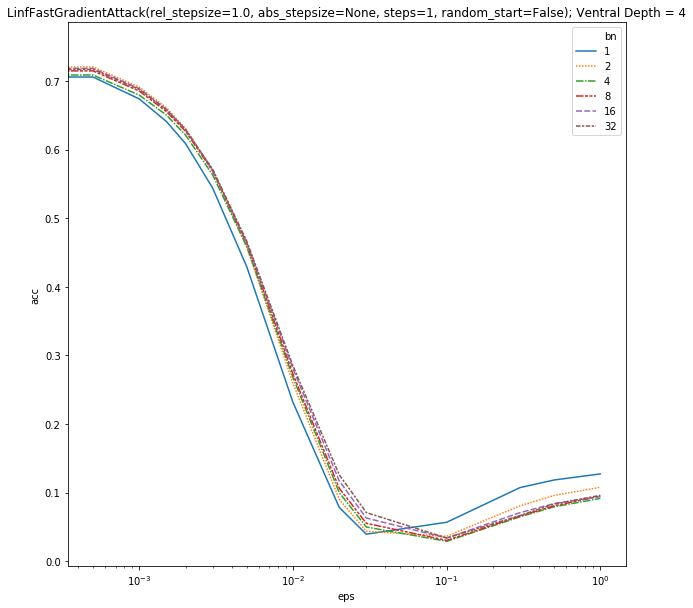

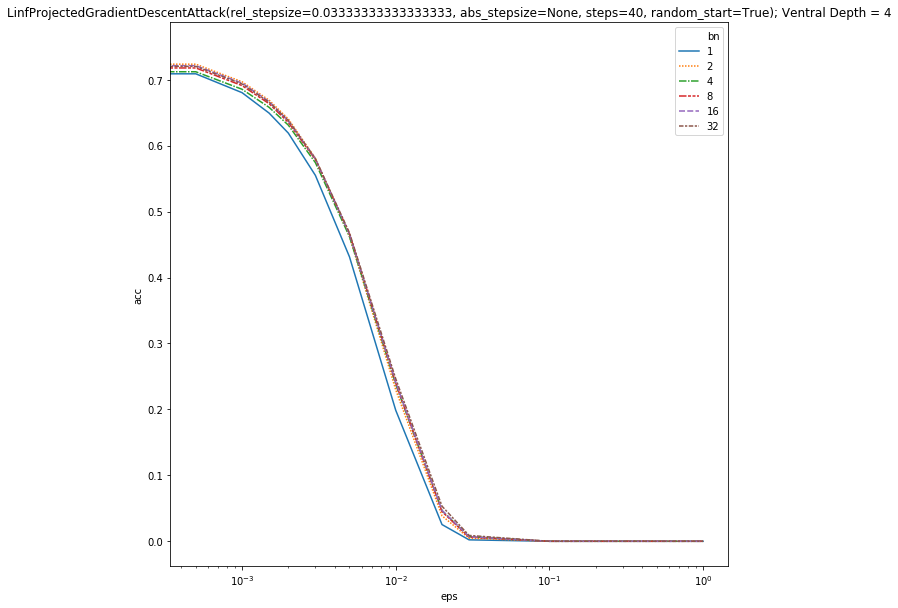

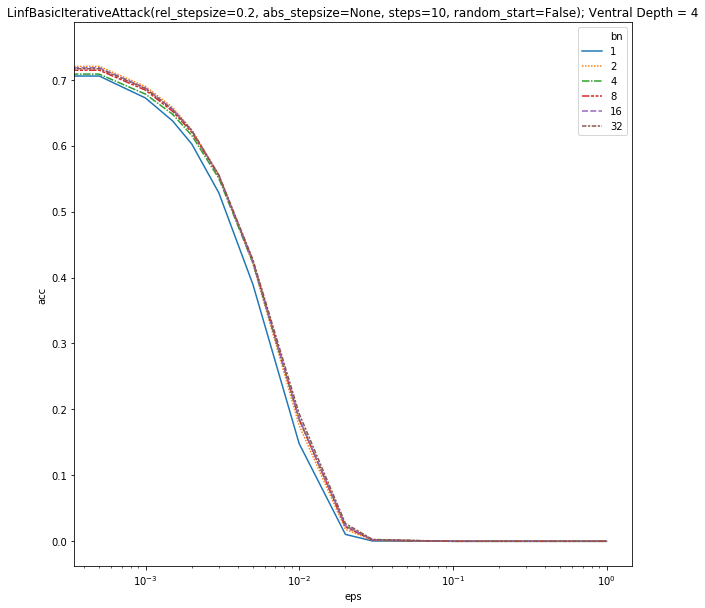

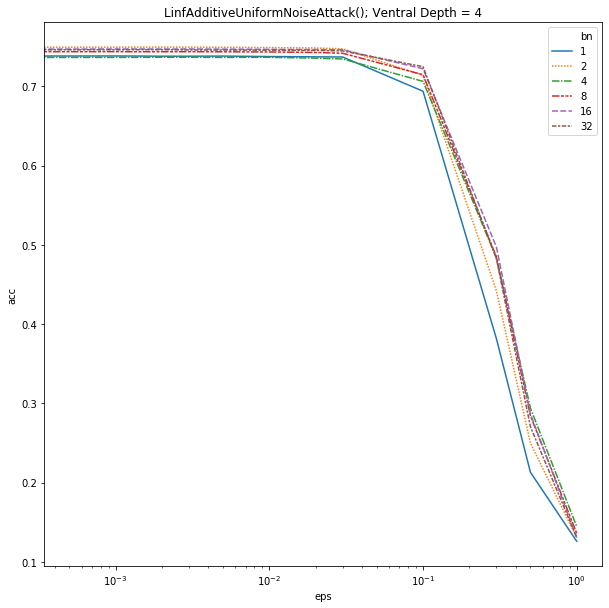

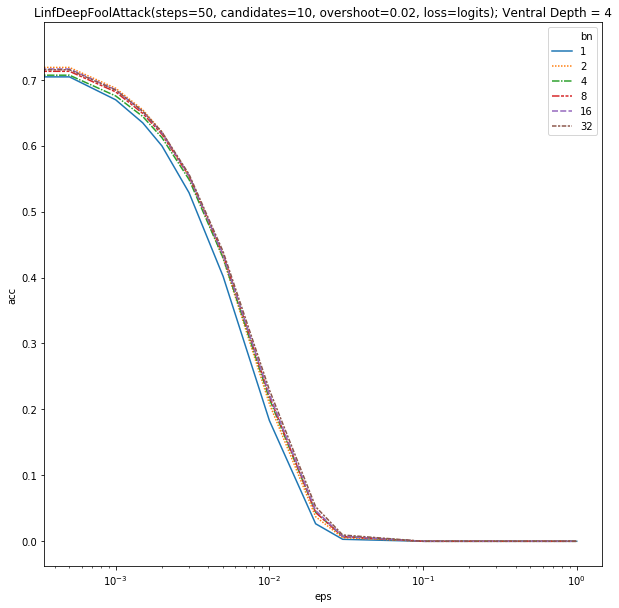

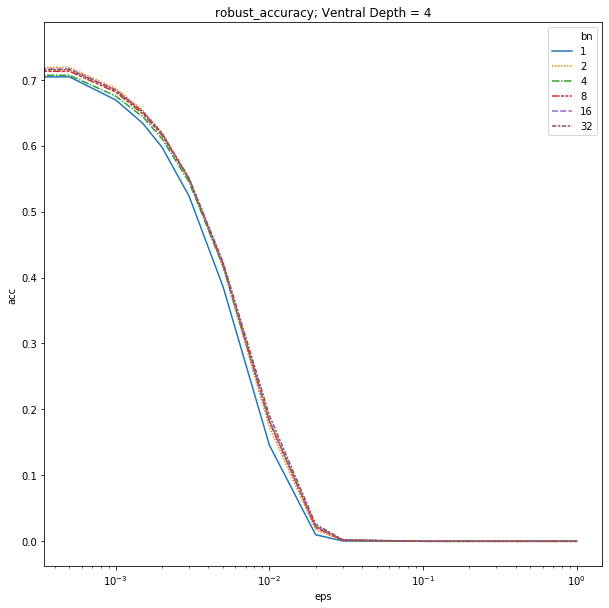

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for attack in df['attack'].unique():
    df2 = df.loc[df['attack'] == attack]
#     for vd in df2['vdepth'].unique():
    vd='4'
    plt.figure(figsize=(10,10))
    g=sns.lineplot(x='eps', y='acc', data=df2.loc[df2['vdepth'] == vd], hue='bn', ci=None, hue_order=['1','2','4','8','16','32'], style='bn', palette=sns.color_palette(n_colors=6))
    g.set(xscale="log")
    g.set(title=attack+"; Ventral Depth = "+vd)